<a href="https://colab.research.google.com/github/Dayn9/LearnTensorFlow/blob/master/OverUnder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# keras.datasets.imdb is broken in 1.13 and 1.14, by np 1.16.3
!pip install tf_nightly

from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

!pip install numpy==1.16.3
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.1-dev20190517


In [0]:
NUM_WORDS = 10000

#import data from the IMDB database 
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


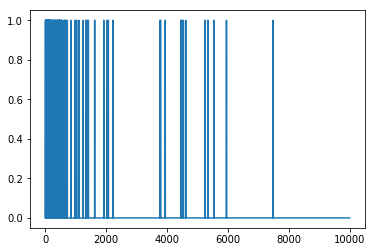

In [5]:
plt.plot(train_data[0])

In [0]:
def model(nodesize, epochs = 20):
  
  #create the model with the appropriate number of nodes in each layer
  model = keras.Sequential([
      keras.layers.Dense(nodesize, activation = tf.nn.relu, input_shape = (NUM_WORDS,)),
      keras.layers.Dense(nodesize, activation = tf.nn.relu),
      keras.layers.Dense(1, activation = tf.nn.sigmoid)
  ])
  
  #comile the model
  
  key='binary_crossentropy'
  
  model.compile(optimizer = 'adam',
                loss = key,
                metrics = ['accuracy', key])
  
  #print out a summary of the model
  model.summary()
  
  #train the model and get the history
  history = model.fit(train_data, train_labels,
                                  epochs=epochs,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)
  
  #plot the history
  plt.figure(figsize = (16, 10))
  
  val = plt.plot(history.epoch, history.history['val_'+key], '--', label='Model')
  plt.plot(history.epoch, history.history[key], color = val[0].get_color(), label='Train Model')
  
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 - 17s - loss: 0.3482 - acc: 0.8473 - binary_crossentropy: 0.3482 - val_loss: 0.2952 - val_acc: 0.8794 - val_binary_crossentropy: 0.2952
Epoch 2/4
25000/25000 - 17s - loss: 0.1451 - acc: 0.9482 - binary_crossentropy: 0.1451 - val_loss: 0.3361 - val_acc: 0.8723 - val_binary_crossentropy: 0.3361
Epoch 3/

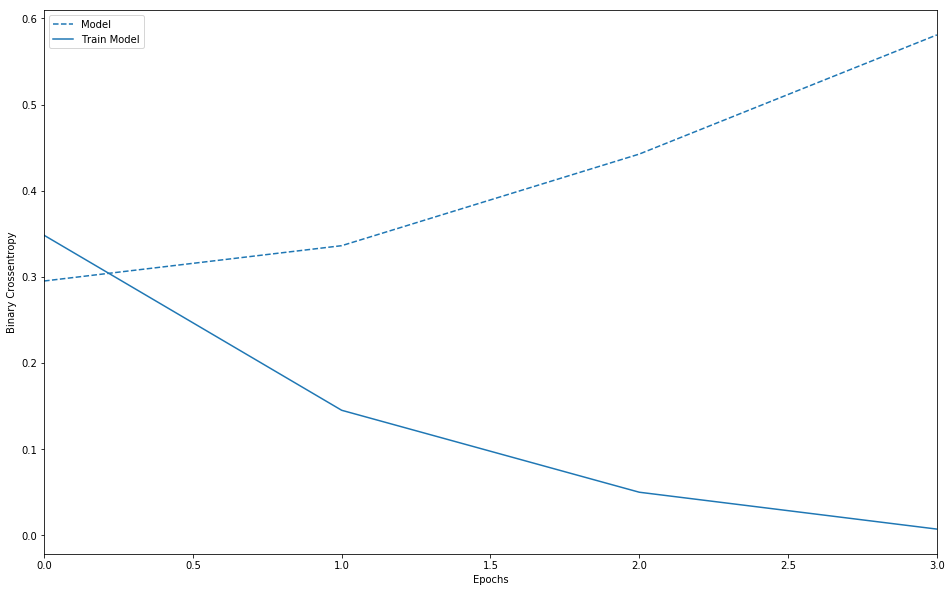

In [16]:
model(512, 4)